In [52]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.dummy import DummyClassifier

In [2]:
!ls

TanzaniaWellsNotebook.ipynb data
combined_wells.csv


In [3]:
!ls data

test_set_values.csv     training_set_labels.csv training_set_values.csv


In [4]:
# Reading in our datasets to explore
df1 = pd.read_csv('data/test_set_values.csv')
df2= pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

In [5]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [9]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
# merging dataframes 2 and 3 on id
df4 = df3.merge(df2, on = "id")
df4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [11]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [12]:
# dropping irrelevant columns
to_drop = ["scheme_name", "id", "public_meeting", "payment_type", "ward", "management", "water_quality", "wpt_name", "installer", "funder", "source_type", "subvillage", "extraction_type", "extraction_type_group", "source", "scheme_management", "construction_year", "quantity_group", "waterpoint_type", "amount_tsh", "region_code", "district_code", "num_private", "date_recorded", "recorded_by"]
df4.drop(to_drop, axis=1, inplace = True)

In [13]:
# dropping any wells that are not located in the Lake Victoria basin (our stakeholder wants to focus on one region)
df4.drop(df4.index[df4['basin'] != 'Lake Victoria'], inplace = True)
df4.head()

,gps_height,longitude,latitude,basin,region,lga,population,permit,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type_group,status_group
1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,Serengeti,280,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,Karagwe,0,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,Karagwe,0,True,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional
18,1162,32.920154,-1.947868e+00,Lake Victoria,Mwanza,Ukerewe,1000,True,other,user-group,never pay,milky,insufficient,groundwater,other,functional needs repair
21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,Bariadi,0,False,handpump,user-group,unknown,unknown,unknown,groundwater,hand pump,functional


In [14]:
# dropping any wells that are not a communal standpipe or hand pump
filtered_df = df4[df4['waterpoint_type_group'].isin(['communal standpipe', 'hand pump'])]

In [15]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 1 to 59385
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   lga                    8330 non-null   object 
 6   population             8330 non-null   int64  
 7   permit                 7987 non-null   object 
 8   extraction_type_class  8330 non-null   object 
 9   management_group       8330 non-null   object 
 10  payment                8330 non-null   object 
 11  quality_group          8330 non-null   object 
 12  quantity               8330 non-null   object 
 13  source_class           8330 non-null   object 
 14  waterpoint_type_group  8330 non-null   object 
 15  sta

In [16]:
filtered_df.rename(columns={"status_group": "target"}, inplace= True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 1 to 59385
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   lga                    8330 non-null   object 
 6   population             8330 non-null   int64  
 7   permit                 7987 non-null   object 
 8   extraction_type_class  8330 non-null   object 
 9   management_group       8330 non-null   object 
 10  payment                8330 non-null   object 
 11  quality_group          8330 non-null   object 
 12  quantity               8330 non-null   object 
 13  source_class           8330 non-null   object 
 14  waterpoint_type_group  8330 non-null   object 
 15  tar

/Users/sarahprusaitis/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [18]:
filtered_df['target'].value_counts()

functional                 4527
non functional             2967
functional needs repair     836
Name: target, dtype: int64

In [19]:
# changing any row that says "functional needs repair" to "non functional"
filtered_df['target'].replace("functional needs repair", "non functional", inplace=True)

/Users/sarahprusaitis/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [20]:
# dropping nulls in the 
fdf = filtered_df.dropna(subset=['permit'])

In [21]:
fdf.drop(['basin'], axis=1, inplace = True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7987 entries, 1 to 59385
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             7987 non-null   int64  
 1   longitude              7987 non-null   float64
 2   latitude               7987 non-null   float64
 3   region                 7987 non-null   object 
 4   lga                    7987 non-null   object 
 5   population             7987 non-null   int64  
 6   permit                 7987 non-null   object 
 7   extraction_type_class  7987 non-null   object 
 8   management_group       7987 non-null   object 
 9   payment                7987 non-null   object 
 10  quality_group          7987 non-null   object 
 11  quantity               7987 non-null   object 
 12  source_class           7987 non-null   object 
 13  waterpoint_type_group  7987 non-null   object 
 14  target                 7987 non-null   object 
dtypes: 

/Users/sarahprusaitis/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
fdf['target'].value_counts()

functional        4342
non functional    3645
Name: target, dtype: int64

In [24]:
fdf['lga'].value_counts()

Bariadi            1078
Karagwe             695
Magu                597
Kwimba              564
Ngara               463
Maswa               449
Musoma Rural        367
Geita               350
Bukoba Rural        348
Serengeti           342
Bunda               321
Sengerema           294
Missungwi           255
Muleba              232
Chato               210
Ukerewe             209
Misenyi             206
Rorya               192
Tarime              159
Shinyanga Rural     146
Meatu               137
Ilemela             119
Kahama               80
Biharamulo           77
Bukoba Urban         58
Ngorongoro           32
Kishapu               6
Nyamagana             1
Name: lga, dtype: int64

In [25]:
fdf['population'].value_counts()

0      6191
250     264
300     160
500     135
350     116
       ... 
33        1
45        1
85        1
89        1
780       1
Name: population, Length: 201, dtype: int64

In [ ]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=filtered_df['permit'].value_counts().index, y=filtered_df['permit'].value_counts())

plt.show()

In [30]:
fdf['extraction_type_class'].value_counts()

handpump        4841
gravity         1975
submersible      509
other            288
motorpump        280
rope pump         92
wind-powered       2
Name: extraction_type_class, dtype: int64

In [27]:
fdf['waterpoint_type_group'].value_counts()

hand pump             5023
communal standpipe    2964
Name: waterpoint_type_group, dtype: int64

the extracion type columns are all similar and should be narrowed down to only one, it is also VERY similar to the waterpoint type group column that was focused on earlier to look at only hand pumps and communal standpipes

In [49]:
from scipy.stats import chi2_contingency

observed = pd.crosstab(fdf['extraction_type_class'], fdf['waterpoint_type_group'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)


print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 7324.637091891358
p-value: 0.0


In [51]:
observed

waterpoint_type_group,communal standpipe,hand pump
extraction_type_class,,
gravity,1952,23
handpump,36,4805
motorpump,278,2
other,168,120
rope pump,25,67
submersible,503,6
wind-powered,2,0


<AxesSubplot:xlabel='extraction_type_class', ylabel='count'>

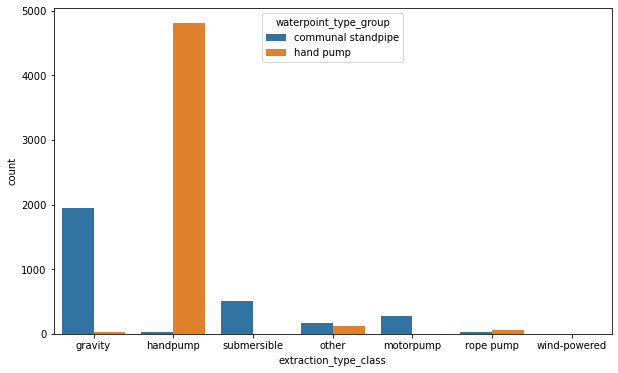

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fdf, x='extraction_type_class', hue='waterpoint_type_group')


<AxesSubplot:xlabel='target', ylabel='count'>

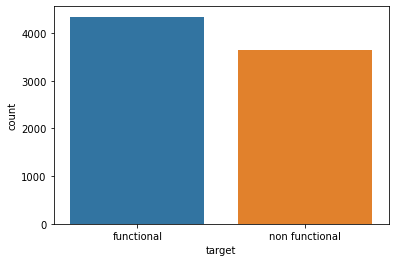

In [43]:
sns.countplot(x='target', data=fdf)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'gravity'),
  Text(1, 0, 'handpump'),
  Text(2, 0, 'submersible'),
  Text(3, 0, 'other'),
  Text(4, 0, 'motorpump'),
  Text(5, 0, 'rope pump'),
  Text(6, 0, 'wind-powered')])

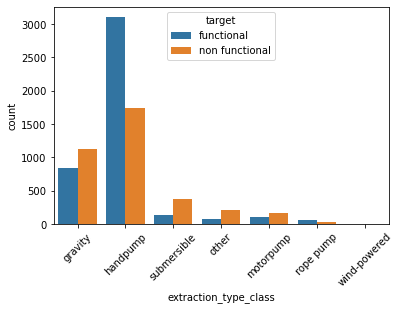

In [47]:
sns.countplot(data=fdf, x='extraction_type_class', hue='target')
plt.xticks(rotation=45)

In [48]:
fdf.to_csv('finaldf.csv', index=False) 